In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
results = pd.read_csv("results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [3]:
# mean r2 and rmse, aggregate folds
results = results.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [4]:
results = results.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [5]:
# how many datasets per major_labl
results.groupby('patient_group').count() / 6

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,major_labl,batch,hca_sample_id
patient_group,,,,,,,,,,
group_1,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
group_2,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
group_3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [6]:
## patient_group, group_1 to myogenic, 2 to ischemic, 3 to fibrotic
results['patient_group'] = results['patient_group'].replace({'group_1': 'Myogenic\n(n=14)', 'group_2': 'Ischemic\n(n=9)', 'group_3': 'Fibrotic\n(n=5)'})

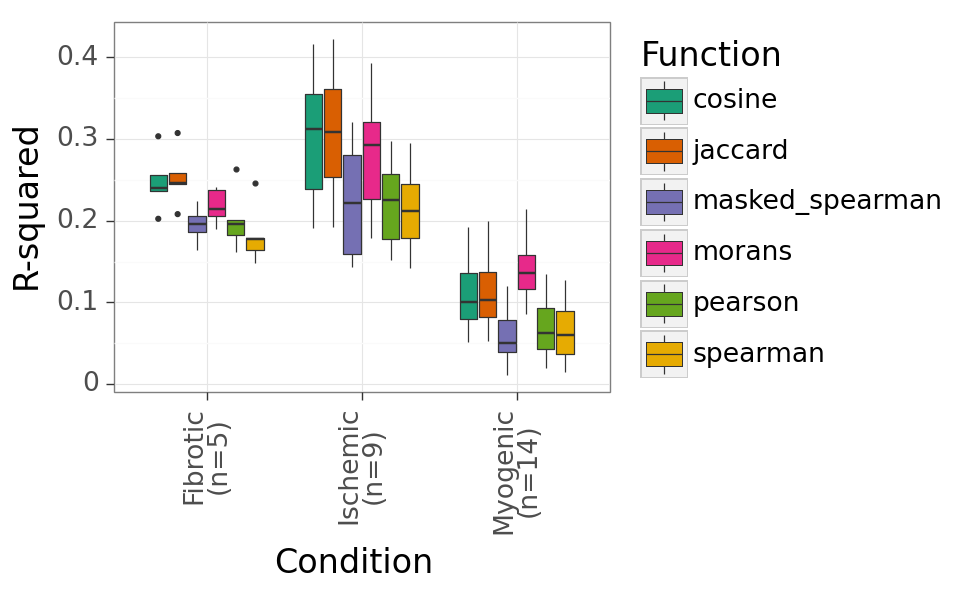

<ggplot: (8793140585154)>

In [10]:
# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='patient_group', y='r2', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=24W) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='R-squared', fill='Function')
        
)

In [ ]:
# violion plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='function_name', y='r2', fill='batch')) +
        p9.geom_violin() +
        p9.theme_bw() +
        p9.theme(axis_text_x=p9.element_text(angle=90))
        
)

In [ ]:
## PCA
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
performance_data = results.pivot(index='dataset_name', columns='function_name', values='r2')

In [ ]:
pca.fit(performance_data)

In [ ]:
transformed_data = pca.transform(performance_data)

In [ ]:
# Plot explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
df_variance = pd.DataFrame({"Components": range(1, len(explained_variance_ratio) + 1),
                            "Cumulative Explained Variance": explained_variance_ratio})



In [ ]:
df = pd.DataFrame(transformed_data, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [ ]:
df.index = performance_data.index

In [ ]:
df = df.merge(metadata, left_index=True, right_on='slide_name', how='left')

In [ ]:
df.head()

In [ ]:
# plot score with metadata labels
(
    p9.ggplot(df, p9.aes(x='PC1', y='PC2', color='major_labl', shape='batch')) +
    p9.geom_point() +
    p9.labs(x='PC1', y='PC2') +
    p9.theme_bw()
    
)